In [1]:
#Dependencies
import os
import csv

# Data Manupulation
import numpy as np
import pandas as pd
import math

# Plotting graphs
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

# Required Sklearn libraries Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

#testing model
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, mean_squared_error, r2_score

# Data fetching
#from pandas_datareader import data as pdr

#using python 3.6

KNN stores the entire training dataset which it uses as its representation. Where can use KNN? The data should be smaller and noise-free.
KNN does not learn any model. It is a lazy learner because it does not learn a discriminitive function in the dataset.
KNN makes predictions just-in-time by calculating the similarity between an input sample and each training instance.
There are many distance measures to choose from to match the structure of your input data.
That it is a good idea to rescale your data, such as using normalization, when using KNN.

In [2]:
#Getting data
df = pd.read_csv("Resources\\voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
#Check the length of the dataset. This is length of y:
len(df)

3168

Data preprocessing

In [4]:
# Assign X (data) and y (target)
X = df.drop("label", axis=1)
y = df["label"]
print(X.shape, y.shape)


#Dummy encoding
#data = X.copy()
#data_binary_encoded = pd.get_dummies(data, columns=["label"])
#data_binary_encoded.head()
#Dummy Encoding
#data = X.copy()
#data_binary_encoded = pd.get_dummies(data, columns=["gender"], drop_first = True)
#data_binary_encoded.head()

(3168, 20) (3168,)


In [5]:
#target = df["Outcome"]
#target_names = ["negative", "positive"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
len(X_train)
#data = df.drop("Outcome", axis=1)
#feature_names = data.columns
#data.head()

2376

In [7]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

#For slicing data to look at all rows, 0 to 7 columns, test 20%
#x = dataset.iloc[:, 0:8]
##just column 8
#y = dataset.iloc[:, 8]

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

(array([  1.,   0.,   1.,   0.,   2.,   1.,   1.,   0.,   3.,   3.,   7.,
          2.,   9.,   9.,   8.,   7.,  19.,  23.,  27.,  25.,  26.,  40.,
         51.,  47.,  61.,  57.,  92., 105., 123., 125., 140., 124., 160.,
        213., 239., 250., 242., 187., 138., 108., 105.,  65.,  67.,  55.,
         55.,  60.,  53.,  25.,   4.,   3.]),
 array([0.03936334, 0.04359855, 0.04783376, 0.05206897, 0.05630418,
        0.06053938, 0.06477459, 0.0690098 , 0.07324501, 0.07748022,
        0.08171543, 0.08595063, 0.09018584, 0.09442105, 0.09865626,
        0.10289147, 0.10712668, 0.11136188, 0.11559709, 0.1198323 ,
        0.12406751, 0.12830272, 0.13253793, 0.13677313, 0.14100834,
        0.14524355, 0.14947876, 0.15371397, 0.15794918, 0.16218438,
        0.16641959, 0.1706548 , 0.17489001, 0.17912522, 0.18336043,
        0.18759563, 0.19183084, 0.19606605, 0.20030126, 0.20453647,
        0.20877168, 0.21300688, 0.21724209, 0.2214773 , 0.22571251,
        0.22994772, 0.23418293, 0.23841813, 0.

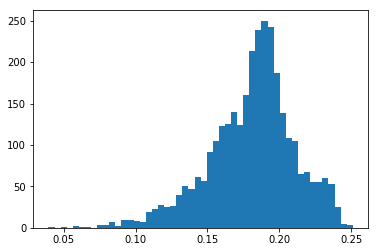

In [8]:
plt.hist(df['meanfreq'], bins = 50)
#scalinng data
#sc_x = StandardScalar()
#X_train = sc_X.fit_transorm(X_train)
#X_test = sc_X.transform(X_test)

In [9]:
#plt.hist(df['label'], bins = 2)

How do we choose the factor k? The KNN algorithm is based on feature similarity. Choosing the right k is a process called parameter tuning. It is important to find the better k for the best accuracy. An odd value for k is selected to avoid confusion between two classes of data. Some people use the square root of n where n is the number of data points.

In [10]:
math.sqrt(len(X_train))

48.744230427815765

In [11]:
math.sqrt(len(y_test))

28.142494558940577

In [12]:
#Defining the model: Init K-NN
classifier =KNeighborsClassifier(n_neighbors=27, p=2, metric = 'euclidean')
#can also use square means or others instead of euclidean. 
#p = 2 for deciding between 2 states.
#Fit model
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array(['male', 'male', 'female', 'female', 'male', 'male', 'female',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'male', 'male', 'female',
       'male', 'male', 'female', 'female', 'female', 'female', 'male',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female',
       'male', 'female', 'male', 'male', 'female', 'male', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'female',
       'male', 'female', 'female', 'female', 'female', 'male', 'female',
       'male', 'male', 'female', 'male', 'female', 'female', 'male',
       'female', 'male', 'female', 'male', 'male', 'male', 'male',
       'female', 'female', 'female', 'female', 'female', 'male', 'female',
  

In [13]:
#Evaluate model
cm = confusion_matrix(y_test, y_pred)
print (cm)
#print(f1_score(y_test, y_pred))  #cannot use this unless change to dummydata or 0s and 1s

[[259 137]
 [107 289]]


In [14]:
#What you tell the general public. This one is poor fit in model.
print(accuracy_score(y_test, y_pred))

0.6919191919191919


k: 1, Train/Test Score: 1.000/0.718
k: 3, Train/Test Score: 0.841/0.735
k: 5, Train/Test Score: 0.797/0.731
k: 7, Train/Test Score: 0.774/0.720
k: 9, Train/Test Score: 0.764/0.702
k: 11, Train/Test Score: 0.752/0.694
k: 13, Train/Test Score: 0.745/0.694
k: 15, Train/Test Score: 0.746/0.697
k: 17, Train/Test Score: 0.739/0.703
k: 19, Train/Test Score: 0.729/0.698
k: 21, Train/Test Score: 0.726/0.702
k: 23, Train/Test Score: 0.729/0.710
k: 25, Train/Test Score: 0.722/0.694
k: 27, Train/Test Score: 0.718/0.692
k: 29, Train/Test Score: 0.716/0.689
k: 31, Train/Test Score: 0.716/0.693
k: 33, Train/Test Score: 0.712/0.693
k: 35, Train/Test Score: 0.710/0.698
k: 37, Train/Test Score: 0.708/0.697
k: 39, Train/Test Score: 0.709/0.701
k: 41, Train/Test Score: 0.706/0.699
k: 43, Train/Test Score: 0.708/0.697
k: 45, Train/Test Score: 0.710/0.696
k: 47, Train/Test Score: 0.707/0.692
k: 49, Train/Test Score: 0.702/0.691
k: 51, Train/Test Score: 0.703/0.692
k: 53, Train/Test Score: 0.701/0.686
k: 55,

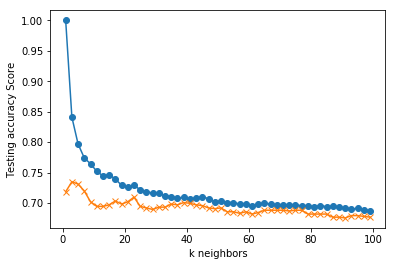

In [15]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
# Note that k: 3 seems to be the best choice for this dataset, but 27 was chosen. Accuracy matched test.
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)
print('k=27 Test Acc: %.3f' % knn.score(X_test, y_test))

k=27 Test Acc: 0.692


In [17]:
#calculate MSE
predicted = knn.predict(X_test)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

ValueError: could not convert string to float: 'female'